**Walmart Kaggle Trip Classification Project**


In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>


##Business Understanding

Commerce stores have millions and millions of customers, what if we could classify them into different groups in order to customize their individual experiences just for them? That’s the goal of this project. The data used for this report comes from Walmart via Kaggle, a platform for predictive modeling and analytics competitions on which companies and researchers post their data and statisticians and data miners from all over the world compete to produce the best models.
    
I chose this specific topic because of my interest in consumer and user behavior. I’m fascinated with the idea of using data science to quantify human behavior.
    
As with any business, Walmart is interested in knowing as much as possible about their consumers in order to create an optimal experience for them.  One-way they are able to improve customers' shopping experiences is by segmenting their store visits into different trip types. This goal of this competition is to classify customer trips using only a transactional dataset of the items they've purchased.

## Data Understanding

In this section we'll explore the given data set and take note of anything that looks interesting.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

###Exploratory Data Analysis

In [3]:
df = pd.read_csv("train 2.csv")
df.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,68113152929,-1,FINANCIAL SERVICES,1000
1,30,7,Friday,60538815980,1,SHOES,8931
2,30,7,Friday,7410811099,1,PERSONAL CARE,4504
3,26,8,Friday,2238403510,2,PAINT AND ACCESSORIES,3565
4,26,8,Friday,2006613744,2,PAINT AND ACCESSORIES,1017


In [4]:
df.count()

TripType                 647054
VisitNumber              647054
Weekday                  647054
Upc                      642925
ScanCount                647054
DepartmentDescription    645693
FinelineNumber           642925
dtype: int64

We can see here there are a few categories where there are missing values - UPC,Department Description, and Fineline number. However, we're not going to drop them in this case because the Kaggle directions specifically list how many columns we're expected to have. Next, let's look at each of the variables individually. 

####TripType

A categorical id representing the type of shopping trip the customer made. This is the ground truth that you are predicting. TripType_999 is an "other" category.


In [5]:
trip_type = df["TripType"]

In [6]:
print "%d unique trip types in the data." % len(trip_type.unique())

38 unique trip types in the data.


In [7]:
trip_type.value_counts().head()

40    174164
39     95504
37     38954
38     29565
25     27609
dtype: int64

We can see the types 39 and 40 are by far the most common triptypes. The rules tell us the 999 is an "other" category.

####VisitNumber

An id corresponding to a single trip by a single customer

In [8]:
df.VisitNumber.value_counts().head()

72439    209
88011    151
9181     113
60971    112
65792    111
dtype: int64

Since each row in the data set is a transaction, this means that visiter number 72439 made 209 transactions, which seams like a lot. By transaction, i mean that when everytime you checkout at a store, each item scanned at the register is a transaction. The Scancount is the number of each specific item (UPC).

####Weekday

The weekday of the trip.

In [9]:
df['Weekday'].value_counts()

Sunday       133975
Saturday     122096
Friday        96247
Monday        83130
Tuesday       72529
Wednesday     71115
Thursday      67962
dtype: int64

We can see the majority of trips take place on the weekend, Saturday and Sunday, which makes a lot of sense considering that's when the majority of people are off from work and get most of their shopping done.

####Upc

The UPC number of the product purchased.

In [10]:
df['Upc'].value_counts().head()

4011           7657
60538862097    2501
7874235186     2067
7874235187     1883
4046           1652
dtype: int64

A key to this project will most likely be how to best utilize this UPC code in the final model.

####ScanCount

The number of the given item that was purchased. A negative value indicates a product return.

In [11]:
df['ScanCount'].value_counts().head()

 1    561489
 2     53002
-1     14394
 3      9445
 4      4536
dtype: int64

This shows that rarey do people buy more than 1 or 2 identical items. One person made 71 purchases of the same item!

####DepartmentDescription 

A high-level description of the item's department.

In [12]:
df['DepartmentDescription'].value_counts().head()

GROCERY DRY GOODS    70402
DSD GROCERY          68332
PRODUCE              51115
DAIRY                43820
PERSONAL CARE        41969
dtype: int64

Not suprising, most people typically purhcase a grocery or personal care item when shopping at Walmart.

####FinelineNumber

A more refined category for each of the products, created by Walmart.

In [13]:
df['FinelineNumber'].value_counts().head()

5501    8244
1508    5121
135     4538
808     4401
0       3837
dtype: int64

Why is there a fineline number of 0? Looks out of place considering it happens so many times, but these were created by Walmart so i'll trust it's for a reason.

###Data Visualization

We've already seen that there are 38 different trip types, let's dig into those more and see if any patterns emerge. 

First let's look at the relationship between trip types and the different departments.

In [14]:
trip_type.value_counts().head()

40    174164
39     95504
37     38954
38     29565
25     27609
dtype: int64

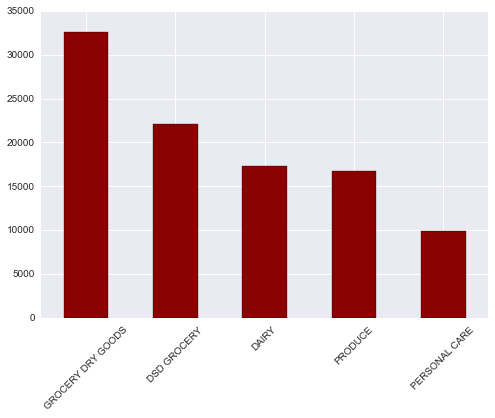

In [15]:
type_40 = df[df.TripType == 40]
type_40_items = type_40[["TripType","DepartmentDescription"]]
type_40_items.DepartmentDescription.value_counts().head().plot(kind="bar",rot=45, color = "darkred")

Type 40 was the most common trip type and now we know why, a lot of regular grocery shopping is in this category.

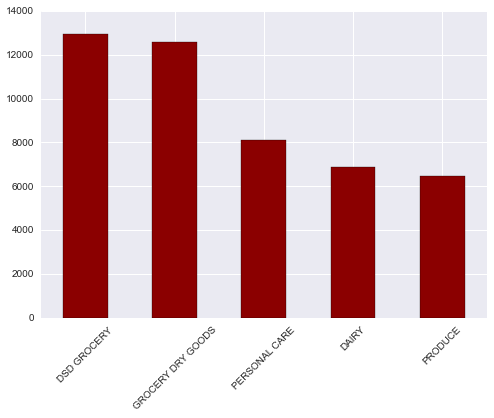

In [16]:
type_39 = df[df.TripType == 39]
type_39_items = type_39[["TripType","DepartmentDescription"]]
type_39_items.DepartmentDescription.value_counts().head().plot(kind="bar",rot=45, color = "darkred")

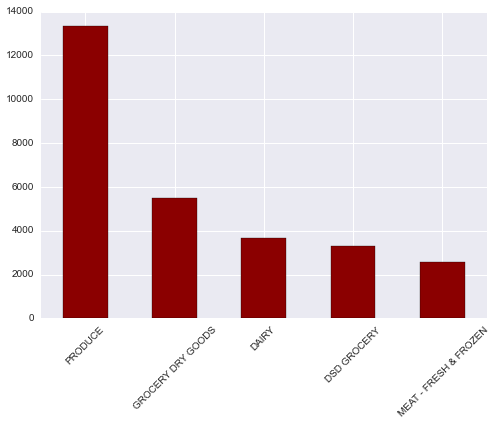

In [17]:
type_37 = df[df.TripType == 37]
type_37_items = type_37[["TripType","DepartmentDescription"]]
type_37_items.DepartmentDescription.value_counts().head().plot(kind="bar",rot=45, color = "darkred")

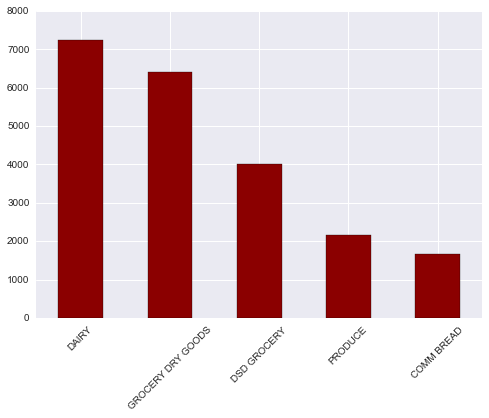

In [18]:
type_38 = df[df.TripType == 38]
type_38_items = type_38[["TripType","DepartmentDescription"]]
type_38_items.DepartmentDescription.value_counts().head().plot(kind="bar",rot=45, color = "darkred")

With all of these options, we can see a clear pattern that the majority of the top trip types have to do with buying some sort of grocery.

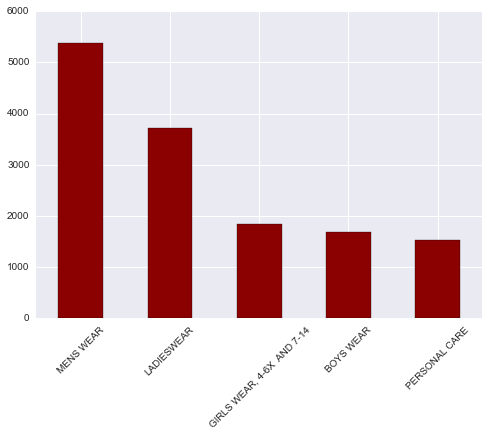

In [19]:
type_25 = df[df.TripType == 25]
type_25_items = type_25[["TripType","DepartmentDescription"]]
type_25_items.DepartmentDescription.value_counts().head().plot(kind="bar",rot=45, color = "darkred")

New category here that we see more clothing related purchases.

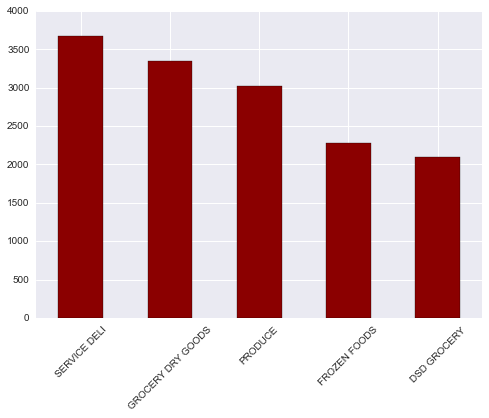

In [20]:
type_7 = df[df.TripType == 7]
type_7_items = type_7[["TripType","DepartmentDescription"]]
type_7_items.DepartmentDescription.value_counts().head().plot(kind="bar",rot=45, color = "darkred")

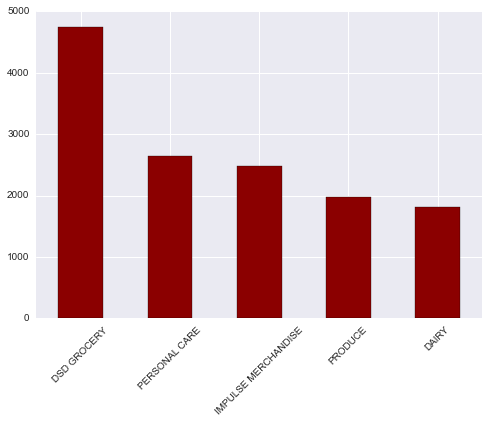

In [21]:
type_8 = df[df.TripType == 8]
type_8_items = type_8[["TripType","DepartmentDescription"]]
type_8_items.DepartmentDescription.value_counts().head().plot(kind="bar",rot=45, color = "darkred")

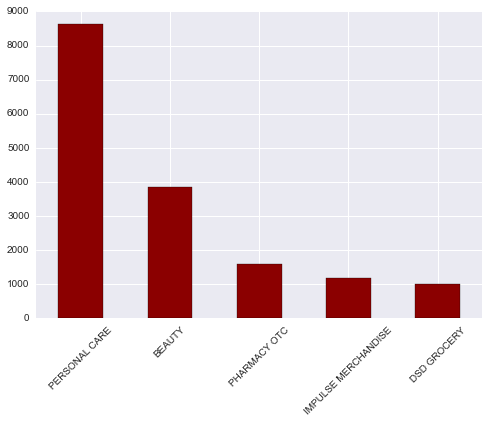

In [22]:
type_36 = df[df.TripType == 36]
type_36_items = type_36[["TripType","DepartmentDescription"]]
type_36_items.DepartmentDescription.value_counts().head().plot(kind="bar",rot=45, color = "darkred")

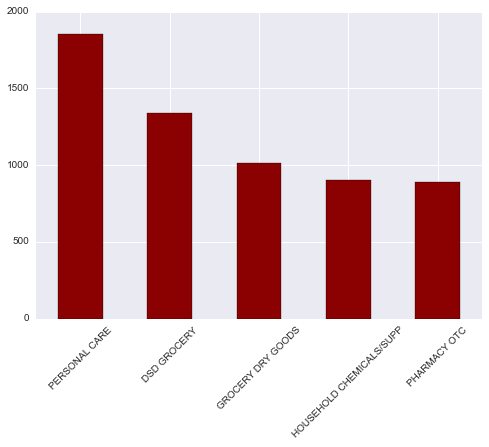

In [23]:
type_44 = df[df.TripType == 44]
type_44_items = type_44[["TripType","DepartmentDescription"]]
type_44_items.DepartmentDescription.value_counts().head().plot(kind="bar",rot=45, color = "darkred")

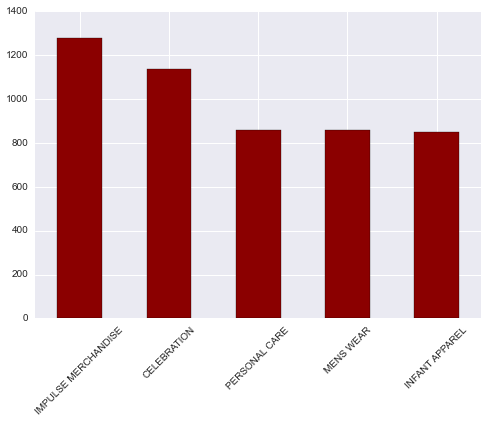

In [24]:
type_42 = df[df.TripType == 42]
type_42_items = type_42[["TripType","DepartmentDescription"]]
type_42_items.DepartmentDescription.value_counts().head().plot(kind="bar",rot=45, color = "darkred")

This is interesting! Quite a combination of impulse buy/celebration combined with mes wear and infant apparel.

##Data Assembly and Preperation

Here we'll clean up the data based on the exploration of the different variables above.

For modeling purposes, it's easier to use numerical data instead of categorical features so let's map the days of the weeks to numbers starting with 1 for Monday.

In [25]:
df['Weekday'] = df['Weekday'].map({"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, 
                                       "Saturday": 6, "Sunday": 7})

In [26]:
df.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,5,68113152929,-1,FINANCIAL SERVICES,1000
1,30,7,5,60538815980,1,SHOES,8931
2,30,7,5,7410811099,1,PERSONAL CARE,4504
3,26,8,5,2238403510,2,PAINT AND ACCESSORIES,3565
4,26,8,5,2006613744,2,PAINT AND ACCESSORIES,1017


###Feature Engineering

Feature engineering is about the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

####Return Column
One feature that immediately stood out to me was adding in a column to see if a transaction was a purchase or a return. We'll insert a 1 for a return and a 0 for a purchase. 

In [27]:
df["Return"] = (df["ScanCount"]<=0).astype(int)

In [28]:
df["Return"].value_counts()

0    631596
1     15458
dtype: int64

We can see from the above that majority of transactions in the data were purchases.

####Dummy Department Descriptions
Next, I'd like to split the department descriptions into seperate columns in order to easily use in a model. To do this we can use the `pd.get_dummies` function.

In [29]:
df = pd.concat([df, pd.get_dummies(df.DepartmentDescription)], axis=1)

In [30]:
df.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,Return,1-HR PHOTO,ACCESSORIES,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
0,999,5,5,68113152929,-1,FINANCIAL SERVICES,1000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30,7,5,60538815980,1,SHOES,8931,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,30,7,5,7410811099,1,PERSONAL CARE,4504,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,8,5,2238403510,2,PAINT AND ACCESSORIES,3565,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26,8,5,2006613744,2,PAINT AND ACCESSORIES,1017,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Before we start modeling, let's make a function that easily transforms all of the data so that we don't have to manually do everything again later on the training set. Another thing i'd like to do to the data is group by visit number so that we can see a better view of the dataset. We'll also drop the UPC,FinelineNumber,and Department Description columns.

In [31]:
def data_transformation(data):
    '''Transform original df to group by visitnumber and add in new features.'''
    
    data = pd.concat([data, pd.get_dummies(data.DepartmentDescription)], axis=1) #get dummies of department
    
    data['Weekday'] = data['Weekday'].map({"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, 
                                           "Saturday": 6, "Sunday": 7})#maps days of the week
    
    data["Return"] = (data["ScanCount"]<=0).astype(int) # adds in return column
    
    grouped = data.groupby("VisitNumber")
    grouped = grouped.agg({'Weekday': np.max, "TripType": np.max, 'ScanCount': np.sum, 'Return': np.max, 
              '1-HR PHOTO': np.sum, 'ACCESSORIES': np.sum,
       'AUTOMOTIVE': np.sum, 'BAKERY': np.sum, 'BATH AND SHOWER': np.sum, 'BEAUTY': np.sum, 'BEDDING': np.sum,
       'BOOKS AND MAGAZINES': np.sum, 'BOYS WEAR': np.sum, 'BRAS & SHAPEWEAR': np.sum,
       'CAMERAS AND SUPPLIES': np.sum, 'CANDY, TOBACCO, COOKIES': np.sum, 'CELEBRATION': np.sum,
       'COMM BREAD': np.sum, 'CONCEPT STORES': np.sum, 'COOK AND DINE': np.sum, 'DAIRY': np.sum, 'DSD GROCERY': np.sum,
       'ELECTRONICS': np.sum, 'FABRICS AND CRAFTS': np.sum, 'FINANCIAL SERVICES': np.sum,
       'FROZEN FOODS': np.sum, 'FURNITURE': np.sum, 'GIRLS WEAR, 4-6X  AND 7-14': np.sum,
       'GROCERY DRY GOODS': np.sum, 'HARDWARE': np.sum, 'HEALTH AND BEAUTY AIDS': np.sum, 'HOME DECOR': np.sum,
       'HOME MANAGEMENT': np.sum, 'HORTICULTURE AND ACCESS': np.sum,
       'HOUSEHOLD CHEMICALS/SUPP': np.sum, 'HOUSEHOLD PAPER GOODS': np.sum,
       'IMPULSE MERCHANDISE': np.sum, 'INFANT APPAREL': np.sum, 'INFANT CONSUMABLE HARDLINES': np.sum,
       'JEWELRY AND SUNGLASSES': np.sum, 'LADIES SOCKS': np.sum, 'LADIESWEAR': np.sum,
       'LARGE HOUSEHOLD GOODS': np.sum, 'LAWN AND GARDEN': np.sum, 'LIQUOR,WINE,BEER': np.sum,
       'MEAT - FRESH & FROZEN': np.sum, 'MEDIA AND GAMING': np.sum, 'MENS WEAR': np.sum, 'MENSWEAR': np.sum,
       'OFFICE SUPPLIES': np.sum, 'OPTICAL - FRAMES': np.sum, 'OPTICAL - LENSES': np.sum,
       'OTHER DEPARTMENTS': np.sum, 'PAINT AND ACCESSORIES': np.sum, 'PERSONAL CARE': np.sum,
       'PETS AND SUPPLIES': np.sum, 'PHARMACY OTC': np.sum, 'PHARMACY RX': np.sum,
       'PLAYERS AND ELECTRONICS': np.sum, 'PLUS AND MATERNITY': np.sum, 'PRE PACKED DELI': np.sum,
       'PRODUCE': np.sum, 'SEAFOOD': np.sum, 'SEASONAL': np.sum, 'SERVICE DELI': np.sum, 'SHEER HOSIERY': np.sum,
       'SHOES': np.sum, 'SLEEPWEAR/FOUNDATIONS': np.sum, 'SPORTING GOODS': np.sum,
       'SWIMWEAR/OUTERWEAR': np.sum, 'TOYS': np.sum, 'WIRELESS': np.sum})
    data = grouped[["TripType", "Weekday", "ScanCount", "Return",'1-HR PHOTO', 'ACCESSORIES',
           'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
           'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
           'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
           'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
           'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
           'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
           'GROCERY DRY GOODS', 'HARDWARE', 'HEALTH AND BEAUTY AIDS', 'HOME DECOR',
           'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
           'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
           'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
           'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
           'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
           'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENS WEAR', 'MENSWEAR',
           'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
           'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
           'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
           'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
           'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
           'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
           'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']]
    return data

In [32]:
#Test to make sure above function works properly
df_test = pd.read_csv("train 2.csv")
data = data_transformation(df_test)
data.head()

,TripType,Weekday,ScanCount,Return,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
5,999,5,-1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,30,5,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,26,5,28,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,8,5,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,8,5,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Model Development and Evaluation

In this section we'll start looking at a few different models.

In [33]:
from sklearn.cross_validation import train_test_split

mytrain, mytest = train_test_split(data, test_size = .4)
mytrain.TripType = mytrain.TripType.astype(float)
mytrain.Weekday = mytrain.Weekday.astype(float)  
mytrain.ScanCount = mytrain.ScanCount.astype(float)                         
mytest.TripType = mytest.TripType.astype(float)
mytest.Weekday = mytest.Weekday.astype(float)  
mytest.ScanCount = mytest.ScanCount.astype(float)

/Library/Python/2.7/site-packages/pandas/core/generic.py:2005: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [34]:
#Our Final Features for the Models
features = ["Weekday", "ScanCount", "Return", 'ACCESSORIES',
       'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
       'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
       'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
       'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
       'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
       'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
       'GROCERY DRY GOODS', 'HARDWARE', 'HOME DECOR',
       'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
       'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
       'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
       'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
       'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
       'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENS WEAR', 'MENSWEAR',
       'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
       'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
       'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
       'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
       'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
       'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
       'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']

In [35]:
data.head()

,TripType,Weekday,ScanCount,Return,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
5,999,5,-1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,30,5,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,26,5,28,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,8,5,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,8,5,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import sklearn

In [37]:
lr = LogisticRegression()
lr.fit(X = np.asarray(mytrain[features]), y = np.asarray(mytrain.TripType))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [38]:
predictions = lr.predict_proba(np.asarray(mytest[features]))
predictions_notproba = lr.predict(np.asarray(mytest[features]))

In [39]:
log_loss(mytest.TripType, predictions).round(5)

/Library/Python/2.7/site-packages/numpy/core/fromnumeric.py:2507: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


1.28342

Log-loss measures the accuracy of a classifier. It is used when the model outputs a probability for each class, rather than just the most likely class. 

In [40]:
sklearn.metrics.accuracy_score(mytest.TripType, predictions_notproba)

0.64622419649856289

### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf = RandomForestClassifier(n_estimators = 300, max_features=2)

rf = rf.fit(np.asarray(mytrain[features]), 
                    np.asarray(mytrain.TripType))

In [43]:
predictions = rf.predict_proba(np.asarray(mytest[features]))
predictions_notproba = rf.predict(np.asarray(mytest[features]))
log_loss(mytest.TripType, predictions).round(5)

1.3354900000000001

In [44]:
sklearn.metrics.accuracy_score(mytest.TripType, predictions_notproba)

0.66704990854455182

###Gaussian Naive Bayes


In [45]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [46]:
gnb = GaussianNB()
gnb = gnb.fit(np.asarray(mytrain[features]), 
                    np.asarray(mytrain.TripType))

In [47]:
predictions = gnb.predict_proba(np.asarray(mytest[features]))
predictions_notproba = gnb.predict(np.asarray(mytest[features]))
log_loss(mytest.TripType, predictions).round(5)

30.589200000000002

In [48]:
sklearn.metrics.accuracy_score(mytest.TripType, predictions_notproba)

0.082100862294225238

###Bernoulli Naive Bayes

In [49]:
bnb = BernoulliNB()
bnb = bnb.fit(np.asarray(mytrain[features]), 
                    np.asarray(mytrain.TripType))

In [50]:
predictions = bnb.predict_proba(np.asarray(mytest[features]))
predictions_notproba = bnb.predict(np.asarray(mytest[features]))
log_loss(mytest.TripType, predictions).round(5)

1.3912899999999999

In [51]:
sklearn.metrics.accuracy_score(mytest.TripType, predictions_notproba)

0.55910634962111316

###K-NN

In [52]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

In [53]:
knc = KNeighborsClassifier()
knc = knc.fit(np.asarray(mytrain[features]), 
                    np.asarray(mytrain.TripType))

In [54]:
predictions = knc.predict_proba(np.asarray(mytest[features]))
predictions_notproba = knc.predict(np.asarray(mytest[features]))
log_loss(mytest.TripType, predictions).round(5)

6.6379099999999998

In [55]:
sklearn.metrics.accuracy_score(mytest.TripType, predictions_notproba)

0.61818656911418868

##Model Deployment

In [56]:
def data_transformation_test(data):
    
    data = pd.concat([data, pd.get_dummies(data.DepartmentDescription)], axis=1) #get dummies of department
    data['Weekday'] = data['Weekday'].map({"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, 
                                           "Saturday": 6, "Sunday": 7})

    data["Return"] = (data["ScanCount"]<=0).astype(int) # Add in return column
    
    grouped = data.groupby("VisitNumber")
    
    grouped = grouped.agg({'Weekday': np.max,'ScanCount': np.sum, 'Return': np.max,
              '1-HR PHOTO': np.sum, 'ACCESSORIES': np.sum,
       'AUTOMOTIVE': np.sum, 'BAKERY': np.sum, 'BATH AND SHOWER': np.sum, 'BEAUTY': np.sum, 'BEDDING': np.sum,
       'BOOKS AND MAGAZINES': np.sum, 'BOYS WEAR': np.sum, 'BRAS & SHAPEWEAR': np.sum,
       'CAMERAS AND SUPPLIES': np.sum, 'CANDY, TOBACCO, COOKIES': np.sum, 'CELEBRATION': np.sum,
       'COMM BREAD': np.sum, 'CONCEPT STORES': np.sum, 'COOK AND DINE': np.sum, 'DAIRY': np.sum, 'DSD GROCERY': np.sum,
       'ELECTRONICS': np.sum, 'FABRICS AND CRAFTS': np.sum, 'FINANCIAL SERVICES': np.sum,
       'FROZEN FOODS': np.sum, 'FURNITURE': np.sum, 'GIRLS WEAR, 4-6X  AND 7-14': np.sum,
       'GROCERY DRY GOODS': np.sum, 'HARDWARE': np.sum, 'HOME DECOR': np.sum,
       'HOME MANAGEMENT': np.sum, 'HORTICULTURE AND ACCESS': np.sum,
       'HOUSEHOLD CHEMICALS/SUPP': np.sum, 'HOUSEHOLD PAPER GOODS': np.sum,
       'IMPULSE MERCHANDISE': np.sum, 'INFANT APPAREL': np.sum, 'INFANT CONSUMABLE HARDLINES': np.sum,
       'JEWELRY AND SUNGLASSES': np.sum, 'LADIES SOCKS': np.sum, 'LADIESWEAR': np.sum,
       'LARGE HOUSEHOLD GOODS': np.sum, 'LAWN AND GARDEN': np.sum, 'LIQUOR,WINE,BEER': np.sum,
       'MEAT - FRESH & FROZEN': np.sum, 'MEDIA AND GAMING': np.sum, 'MENS WEAR': np.sum, 'MENSWEAR': np.sum,
       'OFFICE SUPPLIES': np.sum, 'OPTICAL - FRAMES': np.sum, 'OPTICAL - LENSES': np.sum,
       'OTHER DEPARTMENTS': np.sum, 'PAINT AND ACCESSORIES': np.sum, 'PERSONAL CARE': np.sum,
       'PETS AND SUPPLIES': np.sum, 'PHARMACY OTC': np.sum, 'PHARMACY RX': np.sum,
       'PLAYERS AND ELECTRONICS': np.sum, 'PLUS AND MATERNITY': np.sum, 'PRE PACKED DELI': np.sum,
       'PRODUCE': np.sum, 'SEAFOOD': np.sum, 'SEASONAL': np.sum, 'SERVICE DELI': np.sum, 'SHEER HOSIERY': np.sum,
       'SHOES': np.sum, 'SLEEPWEAR/FOUNDATIONS': np.sum, 'SPORTING GOODS': np.sum,
       'SWIMWEAR/OUTERWEAR': np.sum, 'TOYS': np.sum, 'WIRELESS': np.sum})
    
    data = grouped[[ "Weekday", "ScanCount","Return",'1-HR PHOTO', 'ACCESSORIES',
           'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
           'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
           'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
           'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
           'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
           'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
           'GROCERY DRY GOODS', 'HARDWARE', 'HOME DECOR',
           'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
           'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
           'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
           'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
           'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
           'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENS WEAR', 'MENSWEAR',
           'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
           'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
           'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
           'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
           'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
           'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
           'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']]
    return data

In [57]:
test = pd.read_csv("test.csv")
test = data_transformation_test(test)

In [58]:
test.head()

,Weekday,ScanCount,Return,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
1,5,4,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,5,4,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,5,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
test_features = ["Weekday", "ScanCount", "Return",'ACCESSORIES', 
           'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
           'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
           'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
           'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
           'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
           'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
           'GROCERY DRY GOODS', 'HARDWARE', 'HOME DECOR',
           'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
           'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
           'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
           'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
           'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
           'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENS WEAR', 'MENSWEAR',
           'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
           'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
           'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
           'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
           'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
           'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
           'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']

In [60]:
def predictions_to_csv(test_predictions):
    test_predictions = pd.DataFrame(test_predictions)
    test_indexes = test.index
    test_predictions = test_predictions.rename(columns = {0:"TripType_3", 1: "TripType_4", 2: "TripType_5", 3: "TripType_6", 
                4: "TripType_7", 5: "TripType_8", 6: "TripType_9", 7: "TripType_12", 8: "TripType_14", 
                9: "TripType_15", 10: "TripType_18", 11: "TripType_19", 12: "TripType_20", 13: "TripType_21",
                14: "TripType_22", 15: "TripType_23", 16: "TripType_24", 17: "TripType_25", 18: "TripType_26", 
                19: "TripType_27", 20: "TripType_28", 21: "TripType_29", 22: "TripType_30", 23: "TripType_31", 
                24: "TripType_32", 25: "TripType_33", 26: "TripType_34", 27: "TripType_35", 28: "TripType_36", 
                29: "TripType_37", 30: "TripType_38", 31: "TripType_39", 32: "TripType_40", 33: "TripType_41", 
                34: "TripType_42", 35: "TripType_43", 36: "TripType_44", 37: "TripType_999"})
    
    test_predictions = test_predictions.apply(lambda row: np.where(row == max(row), 1, 0), axis = 1)
    test_predictions.insert(0, 'VisitNumber', test_indexes)
    
    
    return test_predictions

###Logistic Regression

In [62]:
predictions = lr.predict_proba(np.asarray(test[test_features]))
predictions = predictions_to_csv(predictions)

predictions.to_csv("kagglesubmission1_log.csv", index=False)

###Random Forests

In [63]:
rf = RandomForestClassifier(n_estimators = 300, max_features=2)

rf = rf.fit(np.asarray(test[test_features]), 
                    np.asarray(data.TripType))

predictions = rf.predict_proba(np.asarray(test[test_features]))
predictions = predictions_to_csv(predictions)

predictions.to_csv("kagglesubmission2_rf.csv", index=False)

###Gaussian Naive Bayes

In [64]:
gnb = GaussianNB()
gnb = gnb.fit(np.asarray(test[test_features]), 
                    np.asarray(data.TripType))

predictions = gnb.predict_proba(np.asarray(test[test_features]))
predictions = predictions_to_csv(predictions)

predictions.to_csv("kagglesubmission3_gnb.csv", index=False)

###Bernoulli Naive Bayes

In [65]:
bnb = BernoulliNB()
bnb = bnb.fit(np.asarray(test[test_features]), 
                    np.asarray(data.TripType))

predictions = bnb.predict_proba(np.asarray(test[test_features]))
predictions = predictions_to_csv(predictions)

predictions.to_csv("kagglesubmission4_bnb.csv", index=False)

###K-NN

In [66]:
knc = KNeighborsClassifier()
knc = knc.fit(np.asarray(test[test_features]), np.asarray(data.TripType))
predictions = knc.predict_proba(np.asarray(test[test_features]))

predictions = predictions_to_csv(predictions)

predictions.to_csv("kagglesubmission5_nn.csv", index=False)

##Summary

In conclusion, this was a project focused on Walmart's Trip Classification Kaggle competition. I went over the modeling processes from start to finish and implemented 5 different ML algorithms on the data, including how to use each of them on the test data to produce a submission for the competition.

###Next Steps

If I had more time, the main thing i'd like to look at is feature engineering to see how to incorporate UPC and FinelineNumber to improve the Kaggle score.